# Testes de hipóteses

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
camaras = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/camaras.csv')

## Introdução

Neste documento, vamos formalizar os conceitos de intervalo de confiança e testes de hipóteses. Vamos começar com o intervalo de confiança.

## Intervalos de confiança como testes de hipóteses

### Revisão

O intervalo de confiança é utilizado para criar estimativas intervalares. Quando vemos uma pesquisa que diz que uma média é 50 +/- 5, estamos vendo um intervalo de confiança. O intervalo de confiança é uma faixa de valores que contém o valor real com uma certa probabilidade. Por exemplo, um intervalo de confiança de 95% significa que, se repetirmos o experimento muitas vezes, é esperado que 95% dos intervalos de confiança conterão o valor real.

Não confunda o intervalo de confiança com a probabilidade do parâmetro estar dentro do intervalo. O parâmetro é um valor fixo e não é aleatório. O que é aleatório é o intervalo de confiança, pois é baseado em estimadores amostrais, que são variáveis aleatórias.

Como vimos antes, quando nosso interesse é estimar a média de uma variável contínua, o intervalo de confiança é dado por:

$$
\bar X \pm z_{1-\alpha/2} \sqrt{\frac{S^2}{n}} = \bar X \pm z_{1-\alpha/2} \frac{S}{\sqrt n}
$$

Aqui, $\bar X$ é a média amostral, $S$ é o desvio padrão amostral, $n$ é o tamanho da amostra e $z_{1-\alpha/2}$ é o quantil da distribuição normal padrão. O valor de $z_{1-\alpha/2}$ é escolhido de acordo com o nível de confiança desejado. Por exemplo, para um nível de confiança de 95%, temos $\alpha = 0.05$ e $z_{1-\alpha/2} = 1.96$.

Após observar os dados, trocamos as letras maiúsculas para minúsculas, denotando que estamos saindo do mundo das variáveis aleatórias (as funções que retornam números) para os números em si. Assim, o intervalo de confiança é escrito como:

$$
\bar x \pm z_{1-\alpha/2} \frac{s}{\sqrt n}
$$

#### Aplicação no python

No python, podemos calcular o intervalo de confiança fazendo as seguintes operações:



In [5]:
tempos = camaras.tempo
media = tempos.mean()
sd = tempos.std()
z = stats.norm.ppf(0.975)
n = len(tempos)

vl_intervalo = z * sd / np.sqrt(n)

media - vl_intervalo, media + vl_intervalo

(3.136057807684683, 3.221624914728558)



### Z-score vs t-score

Até agora, vimos o intevalo de confiança baseado no valor de $z_{1-\alpha/2}$, também chamado de z-score.

Uma fonte comum de confusão é a diferença entre o z-score e o t-score. 

Nos livros didáticos, o que temos é que o z-score é usado quando a **variância populacional ($\sigma^2$) é conhecida**, enquanto o t-score é usado quando a variância populacional é desconhecida. 

No entanto, a origem disso está na suposição sobre a **distribuição de probabilidades da variável** de interesse. Quando supomos que a variável de interesse é normal, existe um resultado mostrando que a média amostral ($\bar X$) dividida pelo desvio padrão amostral ($S$) e multiplicada por uma constante **segue uma distribuição t de Student**. Essa constante é chamada de **graus de liberdade** e no caso que estamos estudando é dada por $n-1$, onde $n$ é o tamanho da amostra.

Vamos desenhar a t-student para alguns valores de $n$, comparando-a com a distribuição normal.

<Axes: xlabel='x', ylabel='densidade'>

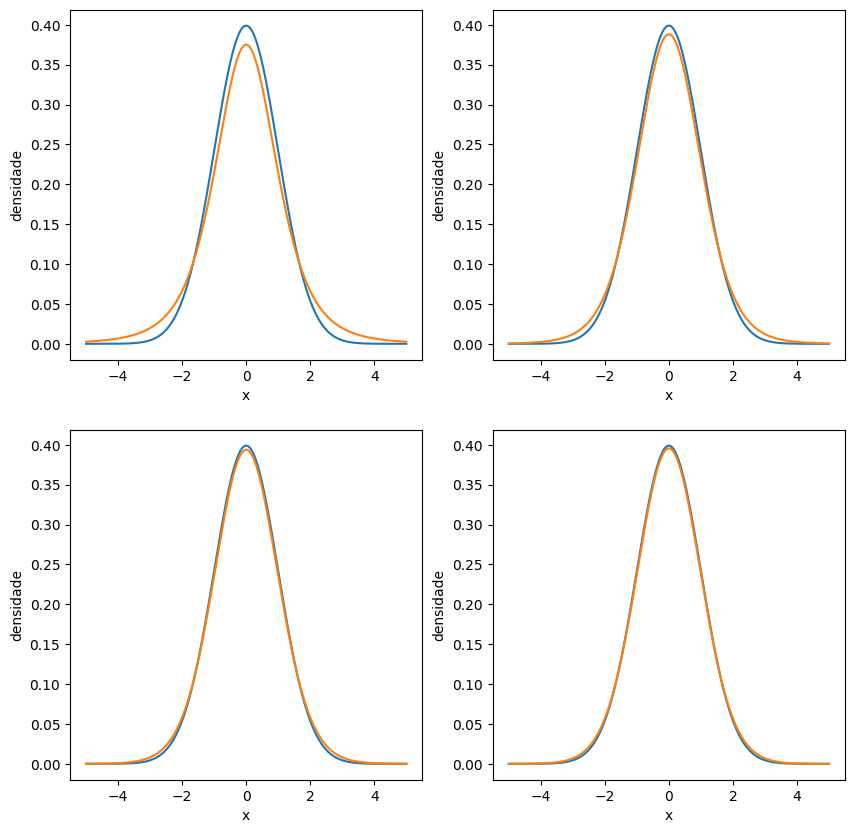

In [15]:
valores_n = [5, 10, 20, 30]

x = np.linspace(-5, 5, 1000)

df = pd.DataFrame({'x': x, 'densidade': stats.norm.pdf(x)})

fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# mostrando a distribuição t-student para os diferentes valores de n

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[0] - 1))
# mostrando o gráfico da normal
sns.lineplot(ax = axes[0,0], data = df, x = 'x', y = "densidade")
# mostrando o gráfico da t-student
sns.lineplot(ax = axes[0,0], data = df, x = 'x', y = 't_pdf')

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[1] - 1))
sns.lineplot(ax = axes[0,1], data = df, x = 'x', y = "densidade")
sns.lineplot(ax = axes[0,1], data = df, x = 'x', y = 't_pdf')

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[2] - 1))
sns.lineplot(ax = axes[1,0], data = df, x = 'x', y = "densidade")
sns.lineplot(ax = axes[1,0], data = df, x = 'x', y = 't_pdf')

df = df.assign(t_pdf = stats.t.pdf(x, df = valores_n[3] - 1))
sns.lineplot(ax = axes[1,1], data = df, x = 'x', y = "densidade")
sns.lineplot(ax = axes[1,1], data = df, x = 'x', y = 't_pdf')


Veja que para valores pequenos de $n$, a t-student é mais larga que a distribuição normal. Isso ocorre porque a variância amostral é uma estimativa da variância populacional e, portanto, é mais incerta. Conforme o tamanho da amostra aumenta, a t-student se aproxima da distribuição normal.

Portanto, o t-score é usado quando temos a suposição de normalidade e é mais útil quando temos poucos dados, já que, quando temos muitos dados, os números são quase equivalentes ao z-score. 

Já o z-score pode ser usado em **duas situações**: 

1) quando assumimos que a variável de interesse tem distribuição normal e variância conhecida (portanto, não temos a razão entre a média e o desvio padrão amostrais), ou 

2) quando a variavel de interesse não é normal e usamos o TCL para aproximar a distribuição amostral da média. Neste segundo caso, existe um teorema adicional, chamado [teorema de Slutsky](https://en.wikipedia.org/wiki/Slutsky%27s_theorem), que, a partir do resultado de que o desvio padrão amostral converge em probabilidade para o desvio padrão da população, mostra que o z-score é assintoticamente normal. 

Por isso que dizemos que o z-score é usado quando a variância populacional é conhecida ou quando o tamanho da amostra é grande. Se não, supomos que a variável de interesse é normal e usamos o t-score.

#### Aplicação no python

No python, podemos fazer o intervalo de confiança com t-score fazendo as seguintes operações:


In [17]:
tempos = camaras.tempo
media = tempos.mean()
sd = tempos.std()
z = stats.norm.ppf(0.975)
tscore = stats.t.ppf(0.975, df = len(tempos) - 1)
n = len(tempos)

vl_intervalo_t = tscore * sd / np.sqrt(n)

media - vl_intervalo_t, media + vl_intervalo_t

(3.1360526281801846, 3.2216300942330562)

Como nossa amostra é grande, o resultado é praticamente o mesmo. Vamos ver com uma amostra pequena, comparando com o z-score:

In [19]:
tempos = camaras.sample(20, random_state=42).tempo

media = tempos.mean()
sd = tempos.std()

z = stats.norm.ppf(0.975)
tscore = stats.t.ppf(0.975, df = len(tempos) - 1)

n = len(tempos)

vl_intervalo_z = z * sd / np.sqrt(n)
vl_intervalo_t = tscore * sd / np.sqrt(n)

print(media - vl_intervalo_z, media + vl_intervalo_z)
print(media - vl_intervalo_t, media + vl_intervalo_t)

2.037385709232428 4.425311073792897
1.9563287310545743 4.5063680519707505


Veja como o intervalo de confiança da normal é mais "otimista" do que o intervalo de confiança da t-student. Isso ocorre porque a t-student é mais larga, refletindo a incerteza adicional devido à variância amostral, enquanto a normal é mais estreita e faz uso de teoremas de convergência para aproximar a distribuição amostral da média.

### Intervalo de confiança para proporção

Na ciência de dados aplicada ao direito, é comum querermos estimar a proporção de um evento. Por exemplo, queremos saber a proporção de decisões favoráveis em um tipo de caso. Neste caso, também utilizamos o TCL para criar intervalos de confiança, afinal, a proporção é um tipo de média, mas de uma variável binária. Vimos anteriormente que a distribuição de probabilidades aplicável no caso de uma variável binária é a distribuição de Bernoulli, sendo que a soma de variáveis Bernoulli é uma variável com distribuição binomial.

**Nota histórica**: a distribuição binomial é uma distribuição discreta (assume valores 0, 1, 2, 3 etc, já que ela é a soma de valores que valem 0 ou 1), enquanto a distribuição normal é uma distribuição contínua. No entanto, o TCL nos permite aproximar a distribuição binomial pela distribuição normal, desde que o tamanho da amostra seja grande. Historicamente, a aproximação da distribuição binomial pela distribuição normal foi feita por Abraham de Moivre em 1743, que descobriu que a distribuição binomial se aproxima da distribuição normal (que nem tinha uma definição clara na época) quando o número de tentativas é grande. Essa demonstração foi feita muito antes do TCL, que é um resultado mais geral.

Para fazer o intervalo de confiança para proporção, utilizamos o TCL, e, portanto, o z-score para criar o intervalo de confiança. O intervalo de confiança é dado por:

$$
\hat p \pm z_{1-\alpha/2} \sqrt{\frac{\hat p (1-\hat p)}{n}}
$$

Aqui, $\hat p$ é a proporção amostral, $n$ é o tamanho da amostra e $z_{1-\alpha/2}$ é o quantil da distribuição normal padrão. O valor de $z_{1-\alpha/2}$ é escolhido de acordo com o nível de confiança desejado. Por exemplo, para um nível de confiança de 95%, temos $\alpha = 0.05$ e $z_{1-\alpha/2} = 1.96$.

Note que utilizamos o valor $\hat p (1-\hat p)$ no lugar de $S$. Isso acontece porque a variância da distribuição de Bernoulli é dada por $p (1 - p)$, fato que não vamos demostrar aqui. Então, substituímos o valor de $p$, desconhecido, pelo valor de $\hat p$, que é a estimativa amostral da proporção. Aqui também fazemos uso do Teorema de Slutsky para afirmar que a distribuição amostral da proporção seja aproximadamente normal.

Mas existe um segundo jeito de fazer intervalo de confiança para proporções. Esse jeito é baseado no valor máximo que a variância da proporção pode assumir. Vamos ver o gráfico dessa função:


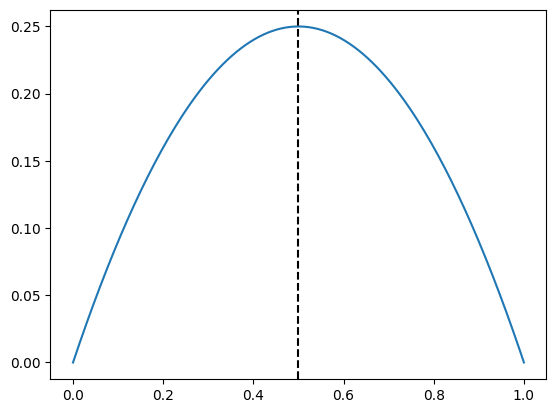

In [24]:
def variancia_bernoulli(p):
  return p * (1 - p)

p_seq = np.linspace(0, 1, 200)

plt.plot(p_seq, variancia_bernoulli(p_seq))
plt.axvline(0.5, color = 'black', linestyle = '--')

Veja que o valor máximo dessa função é 0.25. Isso ocorre porque a variância da proporção é máxima quando a proporção é 0.5. Com isso, podemos fazer um intervalo de confiança mais **conservador**, que é dado por:

$$
\hat p \pm z_{1-\alpha/2} \sqrt{\frac{0.25}{n}} = \hat p \pm \frac{z_{1-\alpha/2}}{2\sqrt n}
$$

#### Aplicação no python

Agora, vamos ver os intervalos de confiança para proporção no python:

In [25]:
desfavoravel = camaras.decisao == 'Negaram'


p_hat = desfavoravel.mean()

intervalo_otimista = stats.norm.ppf(0.975) * np.sqrt(variancia_bernoulli(p_hat) / len(camaras))

intervalo_conservador = stats.norm.ppf(0.975) / 2 / np.sqrt(len(camaras))

print(p_hat - intervalo_otimista, p_hat + intervalo_otimista)

print(p_hat - intervalo_conservador, p_hat + intervalo_conservador)

0.5175147983958988 0.5370852016041012
0.5175001800772997 0.5370998199227003


Como a amostra é grande, os intervalos otimista e conservador são praticamente iguais. Vamos ver com uma amostra pequena:

In [28]:
desfavoravel = camaras.sample(30, random_state=42).decisao == 'Negaram'

p_hat = desfavoravel.mean()

intervalo_otimista = stats.norm.ppf(0.975) * np.sqrt(variancia_bernoulli(p_hat) / len(camaras))

intervalo_conservador = stats.norm.ppf(0.975) / 2 / np.sqrt(len(camaras))

print(p_hat - intervalo_otimista, p_hat + intervalo_otimista)

print(p_hat - intervalo_conservador, p_hat + intervalo_conservador)

0.6574273078376688 0.6759060254956645
0.6568668467439663 0.6764664865893669


Ainda assim, os intervalos são bem próximos. Isso ocorre porque a proporção observada é próxima a 0.5, então o intervalo conservador fica parecido com o otimista. Ao estudar uma informação mais rara, como a probabilidade de maioria nas decisões colegiadas, temos:

In [43]:
maioria = camaras.sample(30, random_state=3).unanimidade == 'Maioria'

p_hat = maioria.mean()

intervalo_otimista = stats.norm.ppf(0.975) * np.sqrt(variancia_bernoulli(p_hat) / len(camaras))

intervalo_conservador = stats.norm.ppf(0.975) / 2 / np.sqrt(len(camaras))

print(p_hat - intervalo_otimista, p_hat + intervalo_otimista)

print(p_hat - intervalo_conservador, p_hat + intervalo_conservador)

0.029815090309067926 0.03685157635759874
0.02353351341063306 0.043133153256033605


## Testes de hipóteses

O teste de hipótese busca responder à seguinte pergunta: há evidências suficientes nos dados para fazer uma afirmação sobre a população? Por exemplo, se observarmos que as taxas de recursos negados em uma câmara é 67,8% e em outra câmara é 70,4%, podemos afirmar que a primeira câmara nega mais casos? Ou essa diferença é devida ao acaso?

Vamos ver esse exemplo no python:

In [50]:
exemplos_camaras = ['03ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,p
0,03ª Câmara de Direito Criminal,528,0.678030
1,08ª Câmara de Direito Criminal,635,0.703937


Uma forma de resolver esse problema é calculando o intervalo de confiança para cada uma das proporções e verificando se os intervalos se sobrepõem. Se eles não se sobrepõem, podemos afirmar que as proporções são diferentes. Se eles se sobrepõem, não podemos afirmar nada. Vamos calcular usando o intervalo otimista:

In [51]:
proporcoes_com_ic = (
  proporcoes
  .assign(
    int_otimista = lambda x: stats.norm.ppf(0.975) * np.sqrt((x.p*(1-x.p)) / x.n),
    p_min = lambda x: x.p - x.int_otimista,
    p_max = lambda x: x.p + x.int_otimista
  )
)

proporcoes_com_ic

,camara,n,p,int_otimista,p_min,p_max
0,03ª Câmara de Direito Criminal,528,0.678030,0.039853,0.638177,0.717884
1,08ª Câmara de Direito Criminal,635,0.703937,0.035508,0.668430,0.739445


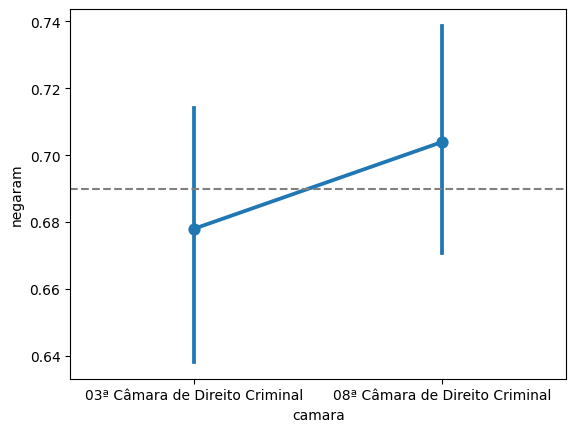

In [53]:
sns.pointplot(data = camaras_filtrado, x = 'camara', y = 'negaram')
plt.axhline(0.69, color='gray', linestyle='--')

**Obs**: O seaborn faz o cálculo do intervalo de confiança automaticamente, logo não precisamos colocar os valores calculados anteriormente. Mas é possível ver que o resultado é o mesmo.

Note que os intervalos se sobrepõem, então, estatisticamente, não podemos afirmar que as proporções são diferentes.

Agora vamos ver um exemplo com outras câmaras.

In [54]:
exemplos_camaras = ['04ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,p
0,04ª Câmara de Direito Criminal,534,0.872659
1,08ª Câmara de Direito Criminal,635,0.703937


Agora, as proporções estão bem distantes. Vamos calcular o intervalo de confiança para essas proporções:

In [55]:
proporcoes_com_ic = (
  proporcoes
  .assign(
    int_otimista = lambda x: stats.norm.ppf(0.975) * np.sqrt((x.p*(1-x.p)) / x.n),
    p_min = lambda x: x.p - x.int_otimista,
    p_max = lambda x: x.p + x.int_otimista
  )
)

proporcoes_com_ic

,camara,n,p,int_otimista,p_min,p_max
0,04ª Câmara de Direito Criminal,534,0.872659,0.028274,0.844385,0.900933
1,08ª Câmara de Direito Criminal,635,0.703937,0.035508,0.668430,0.739445


Finalmente, vamos ver isso graficamente:

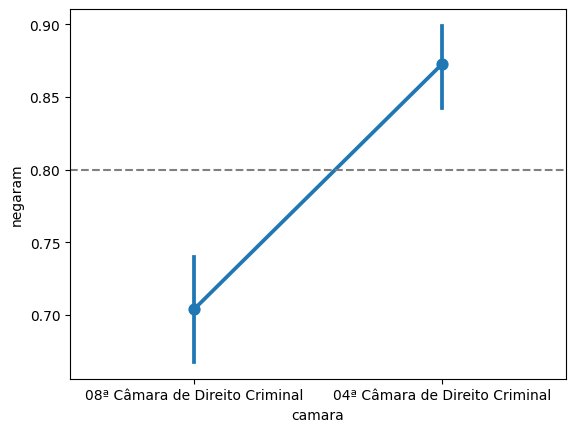

In [56]:
sns.pointplot(data = camaras_filtrado, x = 'camara', y = 'negaram')
plt.axhline(0.80, color='gray', linestyle='--')

Nesse caso, então, concluímos que as proporções são estatisticamente diferentes.

O que acabamos de fazer intuitivamente é o que chamamos de **teste de hipótese de diferença de médias**. No caso, aplicado para proporções. O teste de hipótese é uma forma de formalizar e generalizar a pergunta que fizemos anteriormente. Vamos ver como fazer isso.

### Definição

Um fato curioso sobre o teste de hipóteses é que, geralmente, quando introduzimos o tema, usamos um exemplo jurídico. Isso ocorre porque o teste de hipóteses é uma forma de gerenciar os erros nas tomadas de decisão em ambientes de incerteza, e a tomada de decisão é o que os juízes fazem. Vamos ver esse exemplo, que é o exemplo do julgamento de um réu.

Quando fazemos um teste de hipóteses, estamos tentando decidir entre duas hipóteses: a hipótese nula ($H_0$) e a hipótese alternativa ($H_1$). A hipótese nula é a hipótese que queremos rejeitar, enquanto a hipótese alternativa é a hipótese que queremos aceitar. No exemplo do julgamento de um réu, a hipótese nula é que o réu é inocente, enquanto a hipótese alternativa é que o réu é culpado.

**Dois tipos de erros**. Quando fazemos um teste de hipóteses, podemos cometer dois tipos de erros: o **erro do tipo I** e o **erro do tipo II**. O erro do tipo I ocorre quando rejeitamos a hipótese nula quando ela é verdadeira. No exemplo do julgamento de um réu, seria condenar um réu inocente. O erro do tipo II ocorre quando aceitamos a hipótese nula quando ela é falsa. No exemplo do julgamento de um réu, seria absolver um réu culpado.

![](image.png)

Quando tomamos uma decisão, existem quatro possibilidades:

1) **Rejeitar a hipótese nula quando ela é verdadeira**: isso é o erro do tipo I. A probabilidade de cometer esse erro é chamada de **nível de significância** e é denotada por $\alpha$.

2) **Rejeitar a hipótese nula quando ela é falsa**: isso é o que queremos fazer. A probabilidade de fazer isso é chamada de **poder do teste** e é denotada por $1 - \beta$.

3) **Aceitar a hipótese nula quando ela é verdadeira**: isso é o que queremos evitar. A probabilidade de fazer isso é chamada de **nível de confiança** e é denotada por $1 - \alpha$.

4) **Aceitar a hipótese nula quando ela é falsa**: isso é o erro do tipo II. A probabilidade de cometer esse erro é denotada por $\beta$.

**Definição**. O teste de hipóteses é um procedimento estatístico que nos permite decidir entre duas hipóteses, a hipótese nula ($H_0$) e a hipótese alternativa ($H_1$), com base em uma amostra de dados. O teste de hipóteses é feito em três etapas:

1) **Formulação das hipóteses**: formulamos a hipótese nula ($H_0$) e a hipótese alternativa ($H_1$). A hipótese nula é a hipótese que queremos rejeitar, enquanto a hipótese alternativa é a hipótese que queremos aceitar.

2) **Cálculo da estatística de teste**: calculamos a estatística de teste, que é uma medida da diferença entre a amostra e a hipótese nula. A estatística de teste segue uma distribuição de probabilidades conhecida.

3) **Tomada de decisão**: comparamos a estatística de teste com um valor crítico e decidimos se rejeitamos ou não a hipótese nula.

O procedimento de teste mais conhecido é o teste de Neyman-Pearson, que busca minimizar a probabilidade de erro do tipo II, sujeito a um limite fixado para o erro do tipo I. O teste de Neyman-Pearson é um teste de hipóteses com regra de decisão baseada em um valor crítico.

O valor crítico é o valor que divide a região de rejeição da região de aceitação. A região de rejeição é a região onde rejeitamos a hipótese nula, enquanto a região de aceitação é a região onde aceitamos a hipótese nula. O valor crítico é escolhido de acordo com o nível de significância desejado. Por exemplo, para um nível de significância de 5%, o valor crítico da distribuição normal é 1,96, assim como vimos na parte de intervalos de confiança.

### Na prática

Na prática, colocamos no jogo o famoso valor-p (ou p-valor, dependendo do livro). O valor-p é a probabilidade de observar uma estatística de teste tão extrema quanto a observada, assumindo que a hipótese nula é verdadeira. 

Intuitivamente, o valor-p é a probabilidade de encontrar um resultado tão extremo quanto o observado por coincidência, ou seja, se a hipótese nula for verdadeira. Se o valor-p for pequeno, seria muito arriscado afirmar que um efeito identificado (por exemplo, a diferença de proporções), ocorreu ao acaso. Portanto, rejeitamos a hipótese nula. No entanto, se o valor-p for grande, é bem possível que o resultado encontrado tenha acontecido por acaso, então dizemos que não há evidências para rejeitar a hipótese nula.

### Exemplo

Vamos voltar ao exemplo da diferença entre médias. Faremos um teste de hipóteses para cada situação (o caso em que os intervalos de confiança se sobrepõem e o caso em que os intervalos de confiança não se sobrepõem). Para cada um deles, faremos um exemplo de simulação e outro exemplo com o cálculo direto do valor-p.

#### Intervalos que se sobrepõem

Como vimos anteriormente, temos esse caso aqui:

In [57]:
exemplos_camaras = ['03ª Câmara de Direito Criminal', '08ª Câmara de Direito Criminal']

camaras_filtrado = (
  camaras
  .query('polo_mp == "Passivo"')
  .query('camara == @exemplos_camaras')
  .assign(negaram = lambda x: x.decisao == 'Negaram')
)


proporcoes = (
  camaras_filtrado
  .groupby('camara')
  .agg(n = ('decisao', len), p = ('negaram', 'mean'))
  .reset_index(names='camara')
)

proporcoes

,camara,n,p
0,03ª Câmara de Direito Criminal,528,0.678030
1,08ª Câmara de Direito Criminal,635,0.703937


Nesse caso, nossas hipóteses são:

$H_0$: $p_3 = p_8$, ou seja, as proporções são iguais

$H_1$: $p_3 \neq p_8$, ou seja, as proporções são diferentes

Conectando com os conceitos anteriores: $p_3$ e $p_8$ são **parâmetros**, ou seja, a probabilidade de um caso ser negado em cada câmara.

#### Simulação

Para fazer a simulação desses resultados, precisamos supor, inicialmente, que a hipótese nula é verdadeira. Ou seja, precisamos supor que as proporções são iguais. Vamos fazer isso:

In [ ]:
def calcular_diferenca_entre_medias(dados):
  proporcoes = (
    dados
    .groupby('camara')
    .agg(n = ('decisao', len), p = ('negaram', 'mean'))
    .reset_index(names='camara')
  )
  return proporcoes.p.diff().values[1]